In [55]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo

Практикум номер 3 з дисципліни Інтелектуальний аналіз великих сховищ даних, виконав студент Ка-32МП Гулкевич борис

In [56]:
spambase = fetch_ucirepo(id=94) 
  
# data (as pandas dataframes) 
X_s = spambase.data.features 
y_s = spambase.data.targets 
#statlog_vehicle_silhouettes = fetch_ucirepo(id=149) 
#X_s = statlog_vehicle_silhouettes.data.features 
#y_s = statlog_vehicle_silhouettes.data.targets 

Дані - Spambase. The "spam" concept is diverse: advertisements for products/web sites, make money fast schemes, chain letters, pornography...

The classification task for this dataset is to determine whether a given email is spam or not.

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X_s, y_s, test_size=0.3,
                     stratify=y_s,
                     random_state=0)

In [58]:
print(X_s)

      word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0               0.00               0.64           0.64           0.0   
1               0.21               0.28           0.50           0.0   
2               0.06               0.00           0.71           0.0   
3               0.00               0.00           0.00           0.0   
4               0.00               0.00           0.00           0.0   
...              ...                ...            ...           ...   
4596            0.31               0.00           0.62           0.0   
4597            0.00               0.00           0.00           0.0   
4598            0.30               0.00           0.30           0.0   
4599            0.96               0.00           0.00           0.0   
4600            0.00               0.00           0.65           0.0   

      word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0              0.32            0.00              0.00     

In [59]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std_1 = sc.fit_transform(X_train)
X_test_std_1 = sc.transform(X_test)

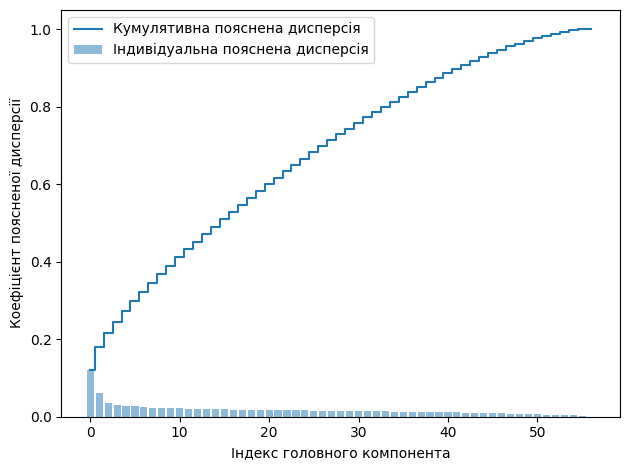

In [60]:
cov_mat = np.cov(X_train_std.T)

eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

import matplotlib.pyplot as plt


plt.bar(range(0, 57), var_exp, alpha=0.5, align='center',
        label='Індивідуальна пояснена дисперсія')
plt.step(range(0, 57), cum_var_exp, where='mid',
         label='Кумулятивна пояснена дисперсія')
plt.ylabel('Коефіцієнт поясненої дисперсії')
plt.xlabel('Індекс головного компонента')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('images/PCA_LDA_02.png', dpi=300)
plt.show()

Розглянувши графік вище я думаю обрати число компонентів у кількості 25. Візьмемо алгоритм PCA.

In [61]:
from sklearn.decomposition import PCA

X_train_std = X_train_std_1
X_test_std = X_test_std_1

In [62]:
pca = PCA(n_components =25, svd_solver = 'full')
pca.fit(X_train_std)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
print(X_train_pca.shape)

(3220, 25)


In [77]:
pca.explained_variance_ratio_.sum()

0.6665343011704373

Для порівняння методів зменшення розмірності використовуватимемо логістичну регресію, яка буде однакова для всіх алгоритмів

In [64]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_pca, y_train)
lr.score(X_test_pca, y_test)

C:\Users\Borya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9203475742215785

Incremental PCA

In [73]:
from sklearn.decomposition import IncrementalPCA

In [75]:
ipca = IncrementalPCA(n_components=25)
ipca.fit(X_train_std)
X_train_ipca=ipca.transform(X_train_std)
X_test_ipca = ipca.transform(X_test_std)

In [78]:
ipca.explained_variance_ratio_.sum()

0.6338104887355465

In [76]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_ipca, y_train)
lr.score(X_test_ipca, y_test)

C:\Users\Borya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9181752353367125

У цьому алгоритмі важливо пам'ятати про параметр batch_size, при вказуванні якого ваша кількість параметрів має бути менша або рівна. У фінальному варіанті я його не використовую, але варто пам'ятати. Загалом, даний алгоритм в кінці на тому ж естіматорі дав нижчу якість ніж просто PCA.

PCA з рандомізованим розкладом за власними числами

Truncated singular value decomposition and latent semantic analysis

In [80]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
svd = TruncatedSVD(n_components=25, random_state=42)
X_train_svd = svd.fit_transform(X_train_std)
X_test_svd = svd.transform(X_test_std)

In [81]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_svd, y_train)
lr.score(X_test_svd, y_test)

C:\Users\Borya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9167270094134685

Для нашого датасету отримано ще гірший результат ніж у попередніх алгоритмах

Розріджений метод головних компонент

SparsePCA 

In [83]:
from sklearn.decomposition import SparsePCA

sparce_pca = SparsePCA(n_components=25, random_state=0)
X_train_sparce = sparce_pca.fit_transform(X_train_std)
X_test_sparce = sparce_pca.transform(X_test_std)

In [84]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_sparce, y_train)
lr.score(X_test_sparce, y_test)

C:\Users\Borya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9123823316437364

MiniBatchSparsePCA

In [85]:
from sklearn.decomposition import MiniBatchSparsePCA

sparce_mpca = MiniBatchSparsePCA(n_components=25, random_state=0)
X_train_msparce = sparce_mpca.fit_transform(X_train_std)
X_test_msparce = sparce_mpca.transform(X_test_std)

In [86]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_msparce, y_train)
lr.score(X_test_msparce, y_test)

C:\Users\Borya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9152787834902245

MiniBatchSparsePCA спрацював швидше за просто SparsePCA та на моєму датасеті показав кращий результат, хоча звісно дещо гірший за перший алгоритм рса

Kernel PCA

In [87]:
from sklearn.decomposition import KernelPCA

In [88]:
kernel_pca = KernelPCA(
    n_components=25, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)
X_train_kpca = pca.fit_transform(X_train_std)
X_test_kpca = pca.transform(X_test_std)
X_train_kpca.shape

(3220, 25)

In [89]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_kpca, y_train)
lr.score(X_test_kpca, y_test)

C:\Users\Borya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9203475742215785

Показує результат ідентичний першому розглянутому алгоритму рса. Я не помітив якоїсь великої різниці з рса у швидкодії на своїх даних, але нібито як цей алгоритм має програвати. Можливо це краще проявляється на інших даних.

Dictionary Learning

In [91]:
from sklearn.decomposition import DictionaryLearning

In [92]:
dict_learner = DictionaryLearning(n_components=25, transform_algorithm='lasso_lars', transform_alpha=0.1,random_state=42)
X_train_dict = dict_learner.fit_transform(X_train_std)
X_test_dict = dict_learner.transform(X_test_std)
X_train_dict.shape

(3220, 25)

In [93]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_dict, y_train)
lr.score(X_test_dict, y_test)

C:\Users\Borya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9000724112961622

Для словникового навчання було отримано результат гірший за усі попередні результати на моїх даних

MiniBatchDictionaryLearning

In [94]:
from sklearn.decomposition import MiniBatchDictionaryLearning

mdict_learner = MiniBatchDictionaryLearning(n_components=25, batch_size=5, 
                                           transform_algorithm='lasso_lars',transform_alpha=0.1, 
                                           random_state=42)

X_train_mdict = mdict_learner.fit_transform(X_train_std)
X_test_mdict = mdict_learner.transform(X_test_std)
X_train_mdict.shape

(3220, 25)

In [95]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_mdict, y_train)
lr.score(X_test_mdict, y_test)

C:\Users\Borya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9044170890658942

У MiniBatchDictionaryLearning відбулося дуже невелике покращення, яке попри все не міняє думки про поки найгірший результат серед усіх алгоритмів, до чого додається їхній довший час на обробку взятих мною даних

Factor Analysis

In [96]:
from sklearn.decomposition import FactorAnalysis

fa = FactorAnalysis(n_components=25, random_state=0)
X_train_fa = fa.fit_transform(X_train_std)
X_test_fa = fa.transform(X_test_std)
X_train_fa.shape

(3220, 25)

In [97]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_fa, y_train)
lr.score(X_test_fa, y_test)

C:\Users\Borya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9145546705286025

У факторного аналізу результат кращий за словниковий аналіз (у порівнянні), але поки гірше за PCA i KernelPCA. При цьому час роботи на взятих мною даних є дуже хорошиим

Independent component analysis

У sklearn представлено швидким алгоритмом FastICA

In [100]:
from sklearn.decomposition import FastICA

fica = FastICA(n_components=25, random_state=0, whiten='unit-variance')
X_train_fica = fica.fit_transform(X_train_std)
X_test_fica = fica.transform(X_test_std)
X_train_fica.shape

(3220, 25)

In [102]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_fica, y_train)
lr.score(X_test_fica, y_test)

C:\Users\Borya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9196234612599565

FastICA поки що найближче підійшов до результатів PCA та KernelPCA, переважаючі інші поки що розглянуті алгоритми. Швидкість роботи на взятих даних теж висока

Метод матричної факторизації 

In [103]:
from sklearn.decomposition import NMF

nmf = NMF(n_components=25, init='random', random_state=0)
X_train_nmf = fica.fit_transform(X_train_std)
X_test_nmf = fica.transform(X_test_std)
X_train_nmf.shape

(3220, 25)

In [107]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_nmf, y_train.values.ravel())
lr.score(X_test_nmf, y_test.values.ravel())

0.9196234612599565

Результат на моїх даних такий самий як і при роботі аналізу незалежних компонент

Скритий розподіл Дирихле

In [112]:
#from sklearn.decomposition import LatentDirichletAllocation

#lda = LatentDirichletAllocation(n_components=25, random_state=0)
#X_train_lda = lda.fit_transform(X_train_std)
#X_test_lda = lda.transform(X_test_std)
#X_train_lda.shape

ValueError: Negative values in data passed to LatentDirichletAllocation.fit

In [113]:
#lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
#lr = lr.fit(X_train_lda, y_train.values.ravel())
#lr.score(X_test_lda, y_test.values.ravel())

Linear Discriminant Analysis

In [114]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [119]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_std,y_train)
X_test_lda = lda.transform(X_test_std)
X_train_lda.shape

C:\Users\Borya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(3220, 1)

In [120]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_lda, y_train.values.ravel())
lr.score(X_test_lda, y_test.values.ravel())

0.9145546705286025

Через кількість класів у базових даних довелося кількість компонент звести до одної. Отримана точність ненайгірша, хоча і не результат PCA/KErnelPCA. Цікавий алгоритм

Автокодувальник з лінійною функцією активації

In [129]:
from sklearn.neural_network import MLPRegressor

autoencoder = MLPRegressor(hidden_layer_sizes=(25,), activation='relu', solver='adam', random_state=42)
autoencoder.fit(X_train_std, X_train_std[:,:25]) 


X_train_auec = autoencoder.predict(X_train_std)
X_test_auec = autoencoder.predict(X_test_std)

In [130]:
X_train_auec.shape

(3220, 25)

In [131]:
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_auec, y_train.values.ravel())
lr.score(X_test_auec, y_test.values.ravel())

0.8819695872556119

У лінійного автокодувальника отримана найгірша точність, можливо це пов'язано з лінійною функцією активації, а можливо з тим що я неправильно використав автокодувальник

Автокодувальник з лінійною функцією активації

In [132]:
autoencoder1 = MLPRegressor(hidden_layer_sizes=(25,), activation='tanh', solver='adam', random_state=42)
autoencoder1.fit(X_train_std, X_train_std[:,:25]) 


X_train_auecn = autoencoder1.predict(X_train_std)
X_test_auecn = autoencoder1.predict(X_test_std)
lr = LogisticRegression(multi_class='ovr', random_state=1, solver='lbfgs')
lr = lr.fit(X_train_auecn, y_train.values.ravel())
lr.score(X_test_auecn, y_test.values.ravel())

C:\Users\Borya\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.8769007965242578

Тож, застосування автокодувальника для зменшення розмірності лише погіршило результати, оскільки нелінійна функція активації дала гірший результат за лінійну. Можливо, проблема у даних, а можливо проблема у невірному застосуванні мною.

Висновок

Найкращий результат було отримано при застосуванні методу PCA та KernelPCA, причому він вийшов однаковим. Звичайно, це залежить від обраних мною даних і необхідної до виконання там задачі класифікації. Також, можливо я впустив якісь параметри які могли б допомогти добитися кращого результату. Використання автокодувальника тільки погіршило результати та дало "віддалений" від кращих методів результат. Хоча це віддалення звісно не дуже і велике.